In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale,minmax_scale,robust_scale
#%matplotlib inline background 그래프 실행 및 결과 확인
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# 데이터 구성 패키지 DataFrame
import pandas as pd

# 행렬 연산 패키지
import numpy as np

# 시각화, subpackage pyplot
import matplotlib
import matplotlib.pyplot as plt

# 통계적 시각화 추세 패키지
import seaborn as sns

# 통계 분석 패키지
import scipy.stats
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest # 비율 검정

from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

In [4]:
from matplotlib import font_manager as fm
font_location = '/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [5]:
df_raw = pd.read_csv('/home/pirl/빅데이터 프로젝트/raw data/MFG_PROCESS.csv', engine='python', encoding='EUC-KR')
df_raw.head()

,JUDGE,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,...,PHOS_FIRE_TEMP_KEEP_CH03,PHOS_FIRE_TEMP_KEEP_CH04,PHOS_FIRE_TEMP_ANEAL_CH01,PHOS_FIRE_TEMP_ANEAL_CH02,PHOS_FIRE_TEMP_ANEAL_CH03,PHOS_FIRE_TEMP_ANEAL_CH04,PHOS_FIRE_EXHAUST_HEAT1,PHOS_FIRE_EXHAUST_HEAT2,PHOS_FIRE_EXHAUST_HEAT3,PHOS_FIRE_EXHAUST_HEAT4
0,양품,LOT-101,PNL-01,2019-04-01T00:01,2019-04-01T05:21,2019-04-01T11:01,2019-04-06T13:41,2019-04-11T03:41,2019-04-03T20:20,2019-04-11T12:41,...,480.0,475.0,443.0,419.0,392.0,372.0,4115.0,3973.0,4432.0,2506.0
1,양품,LOT-101,PNL-02,2019-04-01T00:45,2019-04-01T06:05,2019-04-01T11:45,2019-04-06T14:25,2019-04-11T04:25,2019-04-03T21:04,2019-04-11T13:25,...,480.0,475.0,445.0,423.0,395.0,374.0,3642.0,4097.0,4499.0,2573.0
2,양품,LOT-101,PNL-03,2019-04-01T01:29,2019-04-01T06:49,2019-04-01T12:29,2019-04-06T15:09,2019-04-11T05:09,2019-04-03T21:48,2019-04-11T14:09,...,480.0,475.0,444.0,421.0,393.0,372.0,4063.0,3972.0,4460.0,2502.0
3,양품,LOT-101,PNL-04,2019-04-01T02:13,2019-04-01T07:33,2019-04-01T13:13,2019-04-06T15:53,2019-04-11T05:53,2019-04-03T22:32,2019-04-11T14:53,...,480.0,475.0,444.0,420.0,393.0,372.0,4131.0,4011.0,4466.0,2522.0
4,양품,LOT-101,PNL-05,2019-04-01T02:58,2019-04-01T08:18,2019-04-01T13:58,2019-04-06T16:38,2019-04-11T06:38,2019-04-03T23:17,2019-04-11T15:38,...,480.0,475.0,443.0,420.0,392.0,372.0,3632.0,4073.0,4482.0,2584.0


# 히스토그램

In [4]:
def fun_plot_hist(data, var):
    plt.hist(data[data['JUDGE']=='양품'][var], label='양품', alpha=0.5)
    plt.hist(data[data['JUDGE']=='명점'][var], label='명점', alpha=0.5)
    plt.legend()

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


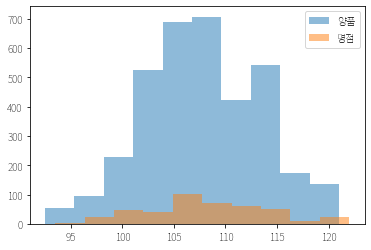

In [5]:

fun_plot_hist(df_raw, 'BLACK_RTD_TEMP_GLASS_END')

# BUS 소성 HEATING

In [40]:
'''HEAT 간의 분포 차이 존재. HEAT1<HEAT2'''

'HEAT 간의 분포 차이 존재. HEAT1<HEAT2'

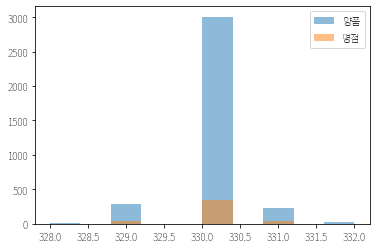

In [6]:

fun_plot_hist(df_raw, 'BUS_FIRE_TEMP_HEAT2_CH03')

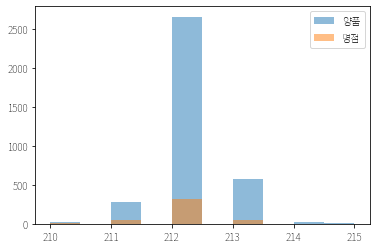

In [9]:

fun_plot_hist(df_raw, 'BUS_FIRE_TEMP_HEAT1_CH03')

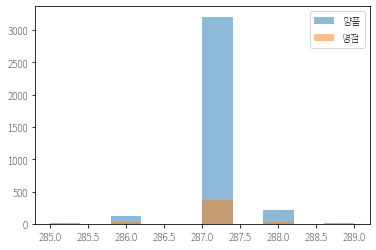

In [7]:

fun_plot_hist(df_raw, 'BUS_FIRE_TEMP_HEAT2_CH02')

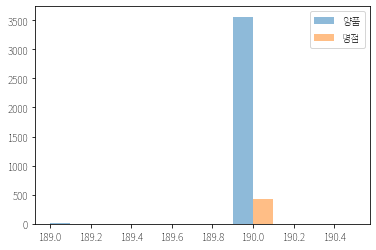

In [11]:

fun_plot_hist(df_raw, 'BUS_FIRE_TEMP_HEAT1_CH02')

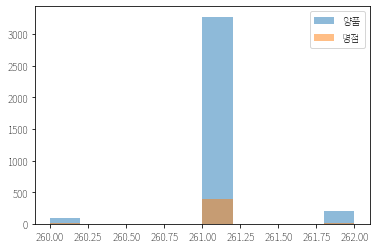

In [8]:

fun_plot_hist(df_raw, 'BUS_FIRE_TEMP_HEAT2_CH01')

# CHAMER 간에도 차이 존재

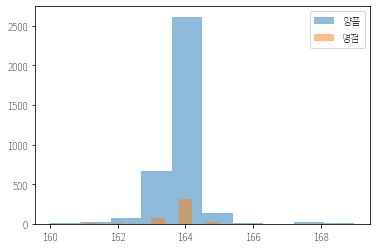

In [12]:

fun_plot_hist(df_raw, 'BUS_FIRE_TEMP_HEAT1_CH01')

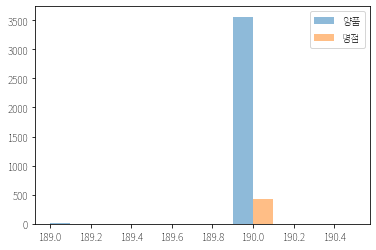

In [18]:

fun_plot_hist(df_raw, 'BUS_FIRE_TEMP_HEAT1_CH02')

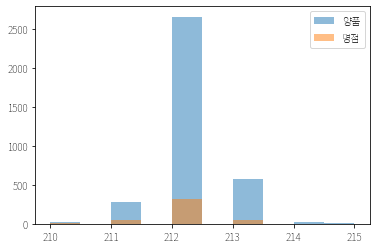

In [19]:

fun_plot_hist(df_raw, 'BUS_FIRE_TEMP_HEAT1_CH03')

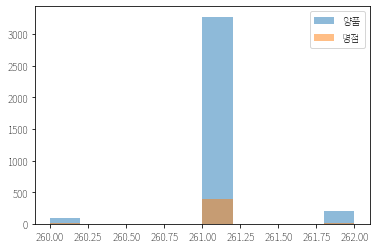

In [20]:

fun_plot_hist(df_raw, 'BUS_FIRE_TEMP_HEAT2_CH01')

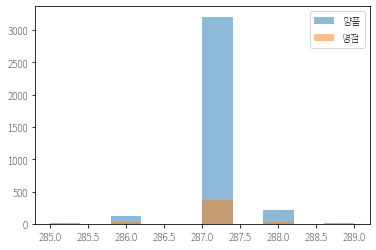

In [21]:

fun_plot_hist(df_raw, 'BUS_FIRE_TEMP_HEAT2_CH02')

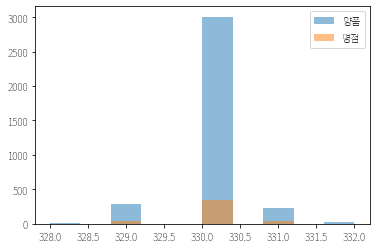

In [22]:

fun_plot_hist(df_raw, 'BUS_FIRE_TEMP_HEAT2_CH03')

# 유전체 소성로도 동일 HEATING 간의 차이

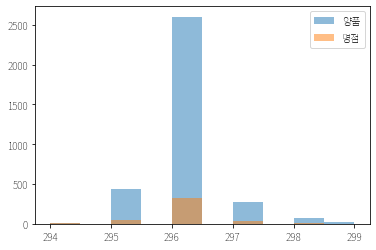

In [13]:

fun_plot_hist(df_raw, 'DIELEC_FIRE_TEMP_HEAT1_CH01')

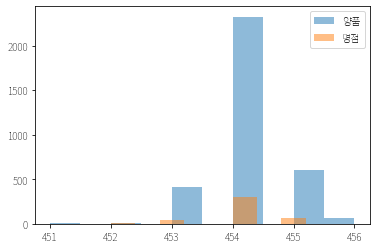

In [14]:

fun_plot_hist(df_raw, 'DIELEC_FIRE_TEMP_HEAT2_CH01')

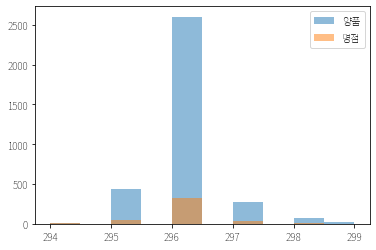

In [16]:

fun_plot_hist(df_raw, 'DIELEC_FIRE_TEMP_HEAT1_CH01')

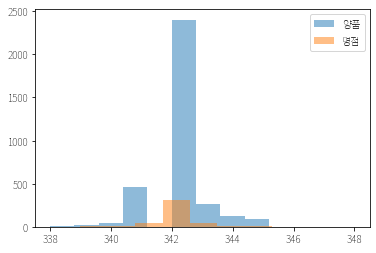

In [15]:

fun_plot_hist(df_raw, 'DIELEC_FIRE_TEMP_HEAT1_CH02')

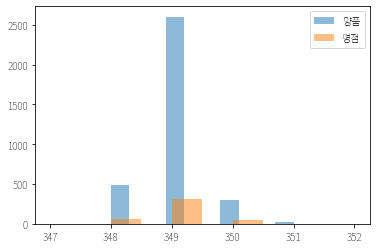

In [17]:

fun_plot_hist(df_raw, 'DIELEC_FIRE_TEMP_HEAT1_CH03')

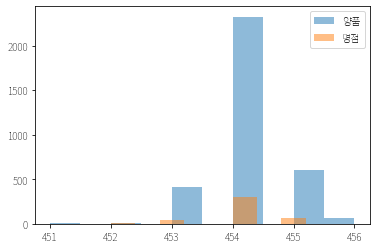

In [23]:

fun_plot_hist(df_raw, 'DIELEC_FIRE_TEMP_HEAT2_CH01')

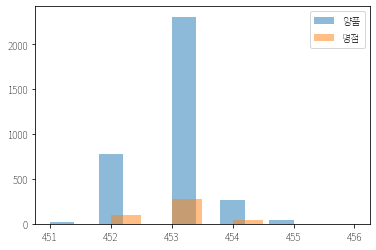

In [24]:

fun_plot_hist(df_raw, 'DIELEC_FIRE_TEMP_HEAT2_CH02')

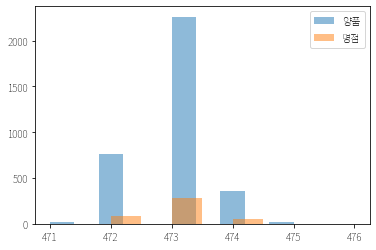

In [25]:

fun_plot_hist(df_raw, 'DIELEC_FIRE_TEMP_HEAT2_CH03')

# 결론: HEATING1 CHAMBER 1.2.3. HEATING2 CHAMBER1.2.3  순으로 온도 크기가 커짐

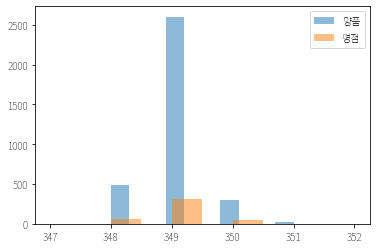

In [26]:

fun_plot_hist(df_raw, 'DIELEC_FIRE_TEMP_HEAT1_CH03')

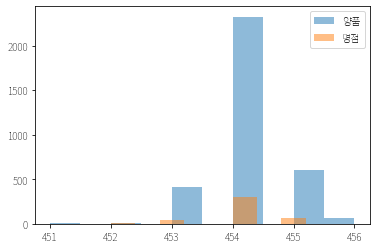

In [27]:

fun_plot_hist(df_raw, 'DIELEC_FIRE_TEMP_HEAT2_CH01')

# 유전체 소성로 배기량 

In [37]:
'''분포가 HEAT마다 다름. 1에서 5까지는 배기량 증가. 6,7 예외'''

'분포가 HEAT마다 다름. 1에서 5까지는 배기량 증가. 6,7 예외'

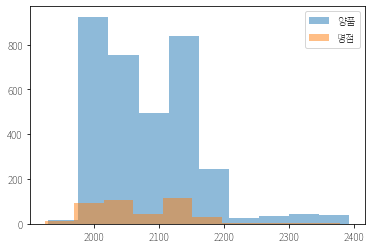

In [28]:
fun_plot_hist(df_raw, 'DIELEC_FIRE_EXHAUST_HEAT1')

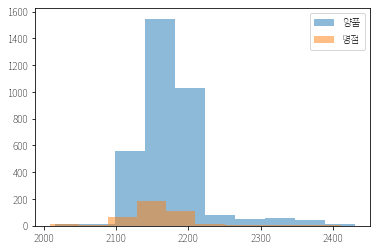

In [30]:
fun_plot_hist(df_raw, 'DIELEC_FIRE_EXHAUST_HEAT2')

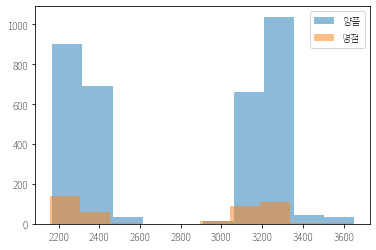

In [31]:
fun_plot_hist(df_raw, 'DIELEC_FIRE_EXHAUST_HEAT3')

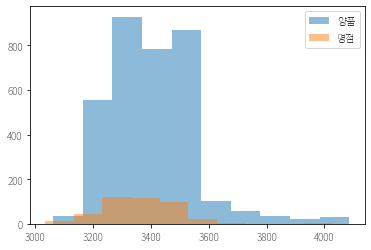

In [32]:
fun_plot_hist(df_raw, 'DIELEC_FIRE_EXHAUST_HEAT4')

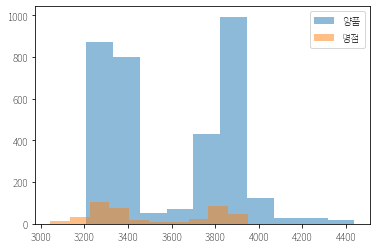

In [33]:
fun_plot_hist(df_raw, 'DIELEC_FIRE_EXHAUST_HEAT5')

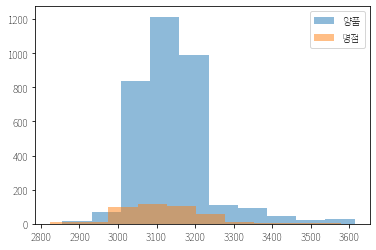

In [34]:
fun_plot_hist(df_raw, 'DIELEC_FIRE_EXHAUST_HEAT6')

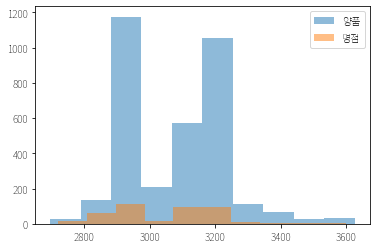

In [35]:
fun_plot_hist(df_raw, 'DIELEC_FIRE_EXHAUST_HEAT7')

# 형광체 소성 HEAT CHAMEBER

In [ ]:
'''1<2<3<4'''

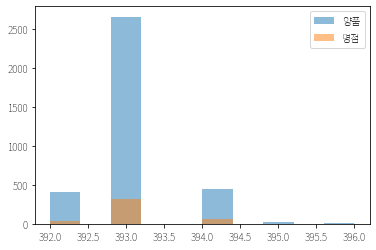

In [41]:

fun_plot_hist(df_raw, 'PHOS_FIRE_TEMP_HEAT_CH01')

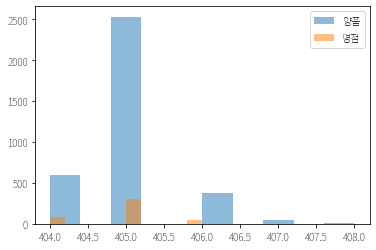

In [42]:

fun_plot_hist(df_raw, 'PHOS_FIRE_TEMP_HEAT_CH02')

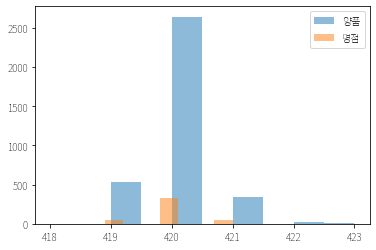

In [43]:

fun_plot_hist(df_raw, 'PHOS_FIRE_TEMP_HEAT_CH03')

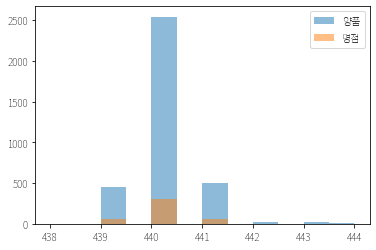

In [44]:

fun_plot_hist(df_raw, 'PHOS_FIRE_TEMP_HEAT_CH04')

# 형광체 소성 KEEP CHAMEBER

In [51]:
'''차이 없음 오히려 3,4의 경우 온도가 떨어짐'''

'차이 없음 오히려 3,4의 경우 온도가 떨어짐'

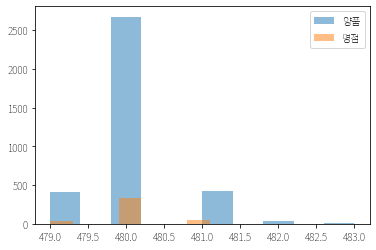

In [46]:

fun_plot_hist(df_raw, 'PHOS_FIRE_TEMP_KEEP_CH01')

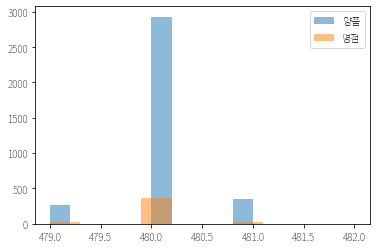

In [47]:

fun_plot_hist(df_raw, 'PHOS_FIRE_TEMP_KEEP_CH02')

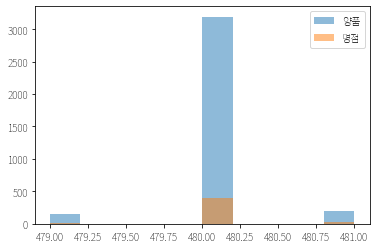

In [48]:

fun_plot_hist(df_raw, 'PHOS_FIRE_TEMP_KEEP_CH03')

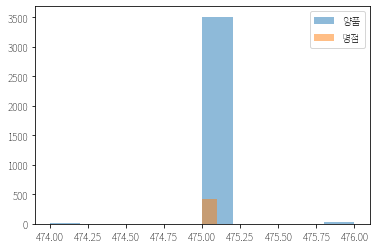

In [49]:

fun_plot_hist(df_raw, 'PHOS_FIRE_TEMP_KEEP_CH04')

# 형광체 소성 ANEALING CHAMEBER

In [57]:
'''4>3>2>1 온도 내려감'''

'4>3>2>1 온도 내려감'

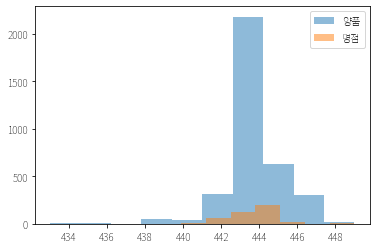

In [53]:

fun_plot_hist(df_raw, 'PHOS_FIRE_TEMP_ANEAL_CH01')

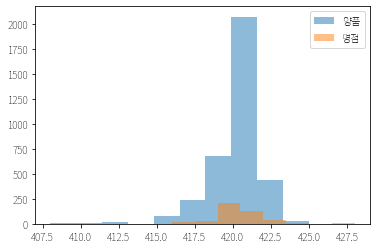

In [54]:

fun_plot_hist(df_raw, 'PHOS_FIRE_TEMP_ANEAL_CH02')

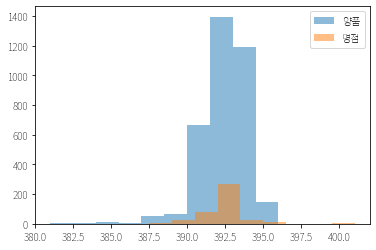

In [55]:

fun_plot_hist(df_raw, 'PHOS_FIRE_TEMP_ANEAL_CH03')

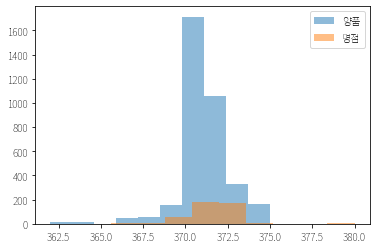

In [56]:

fun_plot_hist(df_raw, 'PHOS_FIRE_TEMP_ANEAL_CH04')

# 형광체 소성로 배기량 

In [63]:
'''HEAT 4의 경우 다른 HEAT보다 배기량이 낮음'''

'HEAT 4의 경우 다른 HEAT보다 배기량이 낮음'

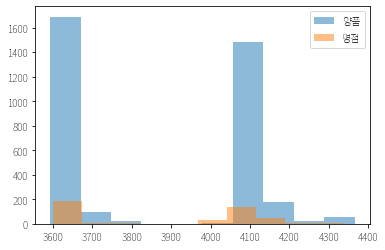

In [58]:
fun_plot_hist(df_raw, 'PHOS_FIRE_EXHAUST_HEAT1')

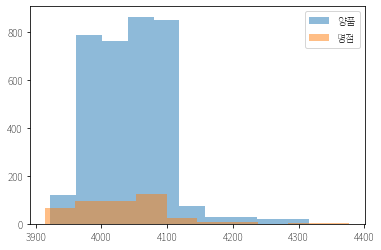

In [59]:
fun_plot_hist(df_raw, 'PHOS_FIRE_EXHAUST_HEAT2')

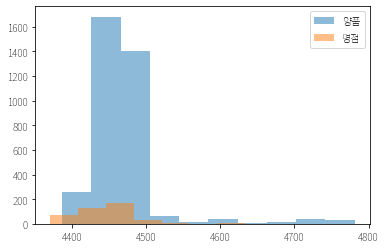

In [60]:
fun_plot_hist(df_raw, 'PHOS_FIRE_EXHAUST_HEAT3')

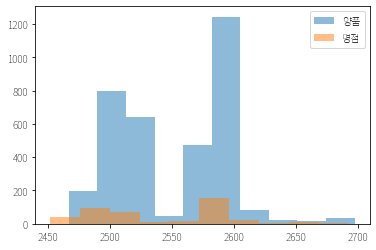

In [61]:
fun_plot_hist(df_raw, 'PHOS_FIRE_EXHAUST_HEAT4')

# BUS_FIRE_TEMP_HEAT1_CH02 : 189, 190 간의 차이

In [8]:
df = df_raw[['JUDGE', 'BUS_FIRE_TEMP_HEAT1_CH02']]

In [10]:
df['JUDGE'] = np.where(df['JUDGE']=='명점', 1, 0)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
a = 'BUS_FIRE_TEMP_HEAT1_CH02'

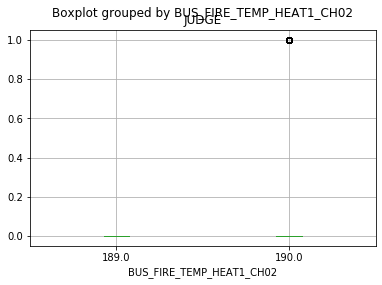

In [17]:
df.boxplot('JUDGE', by='BUS_FIRE_TEMP_HEAT1_CH02')

In [18]:
lm = ols('JUDGE~C(BUS_FIRE_TEMP_HEAT1_CH02)', df).fit()
print(anova_lm(lm))


                                 df      sum_sq   mean_sq         F    PR(>F)
C(BUS_FIRE_TEMP_HEAT1_CH02)     1.0    0.079480  0.079480  0.835255  0.360812
Residual                     3990.0  379.673777  0.095156       NaN       NaN


# 상관계수

In [7]:
df_raw.corr()[::4]

,BLACK_RTD_TEMP_GLASS_START,BLACK_RTD_TEMP_GLASS_END,BLACK_RTD_TEMP_WALL_START,BLACK_RTD_TEMP_WALL_MAX,BLACK_RTD_PRES_START,BLACK_RTD_PRES_END,BLACK_RTD_TEMP_GLASS_OUT,BLACK_RTD_TEMP_HOOD_START,BLACK_RTD_TEMP_HOOD_MAX,AG_RTD_TEMP_GLASS_START,...,PHOS_FIRE_TEMP_KEEP_CH03,PHOS_FIRE_TEMP_KEEP_CH04,PHOS_FIRE_TEMP_ANEAL_CH01,PHOS_FIRE_TEMP_ANEAL_CH02,PHOS_FIRE_TEMP_ANEAL_CH03,PHOS_FIRE_TEMP_ANEAL_CH04,PHOS_FIRE_EXHAUST_HEAT1,PHOS_FIRE_EXHAUST_HEAT2,PHOS_FIRE_EXHAUST_HEAT3,PHOS_FIRE_EXHAUST_HEAT4
BLACK_RTD_TEMP_GLASS_START,1.000000,0.000416,0.562309,0.508248,0.014242,-0.390948,-0.126611,0.348381,0.245748,0.613877,...,0.047039,0.039648,-0.011952,-0.068145,-0.045891,-0.032811,0.006705,0.080207,0.101788,0.074182
BLACK_RTD_PRES_START,0.014242,0.043666,0.026856,-0.050732,1.000000,-0.179370,-0.117915,0.091663,0.055888,0.052283,...,0.044332,-0.015406,0.029649,0.042269,0.076527,0.086232,-0.004032,0.018638,0.062390,0.046530
BLACK_RTD_TEMP_HOOD_MAX,0.245748,0.090149,0.582435,0.457404,0.055888,-0.004361,-0.011728,0.886664,1.000000,0.145467,...,-0.073963,-0.034771,0.051675,0.084973,0.084120,0.076390,0.007384,0.001565,-0.010952,-0.015286
AG_RTD_TEMP_WALL_MAX,-0.022566,-0.005773,0.046328,0.000427,-0.049702,-0.085319,-0.040379,-0.056613,-0.060357,-0.084899,...,0.010855,0.004996,-0.094073,-0.059543,-0.063817,-0.076382,0.001192,-0.056520,-0.000549,-0.018197
AG_RTD_TEMP_HOOD_START,-0.667801,-0.029062,-0.407152,-0.428998,-0.031155,0.245233,-0.067868,-0.200515,-0.140553,-0.419670,...,-0.052477,-0.036973,-0.066740,0.006130,-0.022482,-0.007540,-0.018395,-0.049099,-0.101813,-0.036657
BUS_DEVELOP_TEMP_OVEN2,-0.001538,0.012841,0.044825,0.067302,-0.010015,-0.005235,0.043450,0.034180,-0.003235,0.031400,...,0.093743,0.124699,0.043412,-0.020039,-0.039487,-0.090393,0.005442,0.049627,-0.022120,0.014856
BUS_DEVELOP_PH_TANK1 2,-0.104428,-0.076035,-0.059340,-0.068796,-0.095947,0.034412,0.064452,-0.022713,-0.011063,-0.081454,...,0.009140,0.018121,0.023933,0.041842,0.028104,0.000350,-0.015893,0.042045,-0.000255,0.020454
BUS_DEVELOP_PRES1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BUS_FIRE_TEMP_HEAT1_CH02,0.078428,0.040287,0.038140,0.021987,0.046453,-0.014014,0.036859,-0.006207,-0.015448,0.025285,...,0.002315,0.002751,0.007193,0.014577,0.011573,0.008055,0.003322,-0.021267,-0.007420,-0.008246
BUS_FIRE_TEMP_HEAT2_CH03,0.051115,0.057310,-0.026444,-0.009177,0.058267,0.011890,0.015845,-0.066393,-0.083101,0.085830,...,0.026541,-0.020997,-0.026182,-0.079104,-0.073362,-0.075335,0.002478,-0.031701,0.012311,-0.001549


In [8]:
df1 = pd.DataFrame({'SQ': [1:40001]})
df1

SyntaxError: invalid syntax (<ipython-input-8-a6a8717ec094>, line 1)

In [28]:
df1 = pd.DataFrame()
df1['SQ'] = np.arange(1,4001)
df1['key'] = np.arange(1,4001)
df1.head()

,SQ,key
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5


In [29]:
df_black = df_raw[['BLACK_RTD_TEMP_GLASS_OUT']]
df_black['key'] = np.arange(1,4001)
df_black.head()

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,BLACK_RTD_TEMP_GLASS_OUT,key
0,58.9,1
1,59.0,2
2,58.7,3
3,58.8,4
4,57.3,5


In [33]:
result = pd.merge(df1, df_black, on='key')
result.head()

,SQ,key,BLACK_RTD_TEMP_GLASS_OUT
0,1,1,58.9
1,2,2,59.0
2,3,3,58.7
3,4,4,58.8
4,5,5,57.3


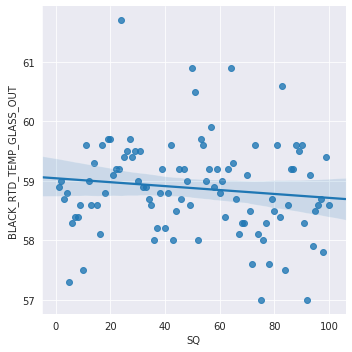

In [34]:
sns.set_style("darkgrid")
sns.lmplot(y= 'BLACK_RTD_TEMP_GLASS_OUT', x = "SQ", data = result[:100])
plt.show()

In [35]:
df = df_raw[['BLACK_RTD_TEMP_GLASS_OUT','AG_RTD_TEMP_GLASS_OUT','BLACK_RTD_TEMP_GLASS_END', 'PHOS_R_DRY_TEMP_GLASS_OUT', 'PHOS_R_DRY_TEMP_HOOD_MAX', 'DIELEC_FIRE_EXHAUST_HEAT3']]
df.head()

,BLACK_RTD_TEMP_GLASS_OUT,AG_RTD_TEMP_GLASS_OUT,BLACK_RTD_TEMP_GLASS_END,PHOS_R_DRY_TEMP_GLASS_OUT,PHOS_R_DRY_TEMP_HOOD_MAX,DIELEC_FIRE_EXHAUST_HEAT3
0,58.9,41.3,102.3,28.3,157.30,3168.0
1,59.0,45.6,101.6,26.7,155.70,2290.0
2,58.7,43.6,114.3,27.5,156.30,3194.0
3,58.8,45.1,115.0,26.5,150.34,3230.0
4,57.3,45.7,109.6,27.4,158.30,2330.0


In [36]:
df['key'] = np.arange(1,4001)
df.head()

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,BLACK_RTD_TEMP_GLASS_OUT,AG_RTD_TEMP_GLASS_OUT,BLACK_RTD_TEMP_GLASS_END,PHOS_R_DRY_TEMP_GLASS_OUT,PHOS_R_DRY_TEMP_HOOD_MAX,DIELEC_FIRE_EXHAUST_HEAT3,key
0,58.9,41.3,102.3,28.3,157.30,3168.0,1
1,59.0,45.6,101.6,26.7,155.70,2290.0,2
2,58.7,43.6,114.3,27.5,156.30,3194.0,3
3,58.8,45.1,115.0,26.5,150.34,3230.0,4
4,57.3,45.7,109.6,27.4,158.30,2330.0,5


In [37]:
result = pd.merge(df1, df, on='key')
result.head()

,SQ,key,BLACK_RTD_TEMP_GLASS_OUT,AG_RTD_TEMP_GLASS_OUT,BLACK_RTD_TEMP_GLASS_END,PHOS_R_DRY_TEMP_GLASS_OUT,PHOS_R_DRY_TEMP_HOOD_MAX,DIELEC_FIRE_EXHAUST_HEAT3
0,1,1,58.9,41.3,102.3,28.3,157.30,3168.0
1,2,2,59.0,45.6,101.6,26.7,155.70,2290.0
2,3,3,58.7,43.6,114.3,27.5,156.30,3194.0
3,4,4,58.8,45.1,115.0,26.5,150.34,3230.0
4,5,5,57.3,45.7,109.6,27.4,158.30,2330.0


In [40]:
sns.set_style("darkgrid")
sns.lmplot(y = ['BLACK_RTD_TEMP_GLASS_OUT','AG_RTD_TEMP_GLASS_OUT','BLACK_RTD_TEMP_GLASS_END', 'PHOS_R_DRY_TEMP_GLASS_OUT', 'PHOS_R_DRY_TEMP_HOOD_MAX', 'DIELEC_FIRE_EXHAUST_HEAT3'], x = "SQ", data = result[:100])
plt.show()

TypeError: '<' not supported between instances of 'list' and 'str'

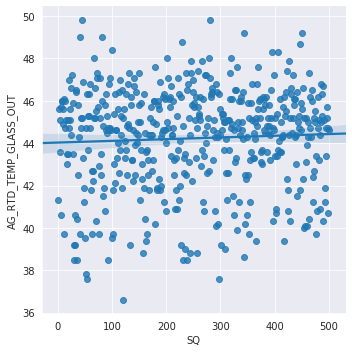

In [43]:
sns.set_style("darkgrid")
sns.lmplot(y = 'AG_RTD_TEMP_GLASS_OUT', x = "SQ", data = result[:500])
plt.show()

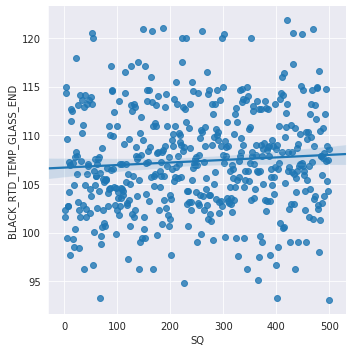

In [44]:
sns.set_style("darkgrid")
sns.lmplot(y = 'BLACK_RTD_TEMP_GLASS_END', x = "SQ", data = result[:500])
plt.show()

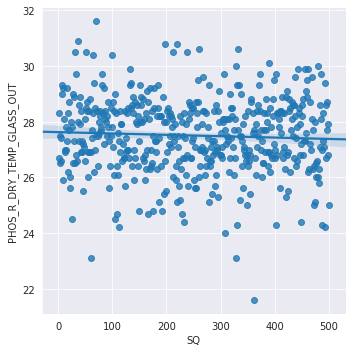

In [46]:
sns.set_style("darkgrid")
sns.lmplot(y = 'PHOS_R_DRY_TEMP_GLASS_OUT', x = "SQ", data = result[:500])
plt.show()

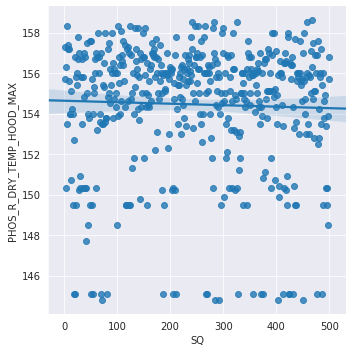

In [47]:
sns.set_style("darkgrid")
sns.lmplot(y = 'PHOS_R_DRY_TEMP_HOOD_MAX', x = "SQ", data = result[:500])
plt.show()

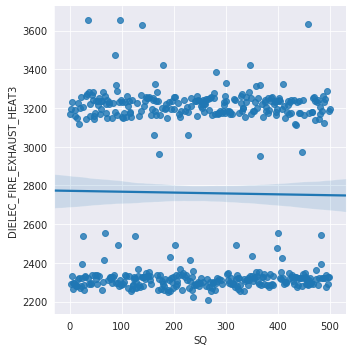

In [48]:
sns.set_style("darkgrid")
sns.lmplot(y =  'DIELEC_FIRE_EXHAUST_HEAT3', x = "SQ", data = result[:500])
plt.show()